In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')  

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [ ]:
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [ ]:
groupDf = df[['user_id', 'Toxicity','qt_flag', 'rt_flag','month']]

In [ ]:
groupDf['Toxicity'] = groupDf['Toxicity'] * 10
groupDf['Toxicity'] = (groupDf['Toxicity'].apply(np.ceil)) / 10

In [ ]:
groupDf = groupDf[groupDf['Toxicity'] != 0.0]

In [ ]:
groupDf['user_id'].nunique()

59848

In [ ]:
monthDf = groupDf[groupDf['month'] == "10"]

In [ ]:
print(monthDf['user_id'].nunique())
print(len(monthDf['Toxicity']))

58848
4679599


In [ ]:
monthDf.head()

,user_id,Toxicity,qt_flag,rt_flag,month
3,773711528398848000,0.1,False,False,10
4,773711528398848000,0.1,False,False,10
5,773711528398848000,0.5,False,False,10
6,773711528398848000,0.3,False,False,10
7,773711528398848000,0.3,False,False,10


In [ ]:
def categorize_tweets(group):
    if (group['qt_flag'] == False).all() and (group['rt_flag'] == False).all():
        return 'o'
    elif (group['qt_flag'] == False).all() and (group['rt_flag'] == True).all():
        return 'r'
    elif (group['qt_flag'] == True).all() and (group['rt_flag'] == False).all():
        return 'q'
    elif ((group['qt_flag'] == False) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_r'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == False)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'o_q'
    elif ((group['qt_flag'] == True) & (group['rt_flag'] == True)).any() and ((group['qt_flag'] == False) & (group['rt_flag'] == False)).any():
        return 'q_r'
    else:
        return 'o_q_r'

In [ ]:
userDf = monthDf.groupby('user_id').apply(categorize_tweets)

In [ ]:
userDf = userDf.reset_index()
userDf = userDf.rename(columns={userDf.columns[1]: "user_category"})

In [ ]:
userDf.head()

,user_id,user_category
0,12,o_q
1,278,o
2,541,o_q
3,586,o_q
4,633,o_q


In [ ]:
userDf

,user_id,user_category
0,12,o_q
1,278,o
2,541,o_q
3,586,o_q
4,633,o_q
...,...,...
58843,924081306308263936,o
58844,924305967029690368,o_q
58845,924344357741846529,o_q
58846,924724225994297346,o_q


In [ ]:
dict_cat = {}

cat_list = ["o", "r", "q", "o_r", "r_q", "o_q", "o_r_q"]

for i in range(7):
    for j in range(10):
        string_want  = f"{cat_list[i]}_{(j+1)/10}" 
        dict_cat[string_want] = 0

print(dict_cat)

{'o_0.1': 0, 'o_0.2': 0, 'o_0.3': 0, 'o_0.4': 0, 'o_0.5': 0, 'o_0.6': 0, 'o_0.7': 0, 'o_0.8': 0, 'o_0.9': 0, 'o_1.0': 0, 'r_0.1': 0, 'r_0.2': 0, 'r_0.3': 0, 'r_0.4': 0, 'r_0.5': 0, 'r_0.6': 0, 'r_0.7': 0, 'r_0.8': 0, 'r_0.9': 0, 'r_1.0': 0, 'q_0.1': 0, 'q_0.2': 0, 'q_0.3': 0, 'q_0.4': 0, 'q_0.5': 0, 'q_0.6': 0, 'q_0.7': 0, 'q_0.8': 0, 'q_0.9': 0, 'q_1.0': 0, 'o_r_0.1': 0, 'o_r_0.2': 0, 'o_r_0.3': 0, 'o_r_0.4': 0, 'o_r_0.5': 0, 'o_r_0.6': 0, 'o_r_0.7': 0, 'o_r_0.8': 0, 'o_r_0.9': 0, 'o_r_1.0': 0, 'r_q_0.1': 0, 'r_q_0.2': 0, 'r_q_0.3': 0, 'r_q_0.4': 0, 'r_q_0.5': 0, 'r_q_0.6': 0, 'r_q_0.7': 0, 'r_q_0.8': 0, 'r_q_0.9': 0, 'r_q_1.0': 0, 'o_q_0.1': 0, 'o_q_0.2': 0, 'o_q_0.3': 0, 'o_q_0.4': 0, 'o_q_0.5': 0, 'o_q_0.6': 0, 'o_q_0.7': 0, 'o_q_0.8': 0, 'o_q_0.9': 0, 'o_q_1.0': 0, 'o_r_q_0.1': 0, 'o_r_q_0.2': 0, 'o_r_q_0.3': 0, 'o_r_q_0.4': 0, 'o_r_q_0.5': 0, 'o_r_q_0.6': 0, 'o_r_q_0.7': 0, 'o_r_q_0.8': 0, 'o_r_q_0.9': 0, 'o_r_q_1.0': 0}


In [ ]:
for index, row in userDf.iterrows():
  cat = userDf['user_category'].iloc[index]
  cat_user = monthDf[monthDf['user_id'] == userDf['user_id'].iloc[index]]
  for j, c_row in cat_user.iterrows():
    t_score = c_row["Toxicity"]
    string_put = f"{cat}_{t_score}"
    dict_cat[string_put] += 1

print(dict_cat)


{'o_0.1': 619391, 'o_0.2': 79690, 'o_0.3': 35574, 'o_0.4': 25267, 'o_0.5': 11575, 'o_0.6': 6275, 'o_0.7': 5840, 'o_0.8': 4329, 'o_0.9': 2824, 'o_1.0': 1024, 'r_0.1': 0, 'r_0.2': 0, 'r_0.3': 0, 'r_0.4': 0, 'r_0.5': 0, 'r_0.6': 0, 'r_0.7': 0, 'r_0.8': 0, 'r_0.9': 0, 'r_1.0': 0, 'q_0.1': 671, 'q_0.2': 56, 'q_0.3': 19, 'q_0.4': 18, 'q_0.5': 7, 'q_0.6': 4, 'q_0.7': 5, 'q_0.8': 2, 'q_0.9': 1, 'q_1.0': 0, 'o_r_0.1': 0, 'o_r_0.2': 0, 'o_r_0.3': 0, 'o_r_0.4': 0, 'o_r_0.5': 0, 'o_r_0.6': 0, 'o_r_0.7': 0, 'o_r_0.8': 0, 'o_r_0.9': 0, 'o_r_1.0': 0, 'r_q_0.1': 0, 'r_q_0.2': 0, 'r_q_0.3': 0, 'r_q_0.4': 0, 'r_q_0.5': 0, 'r_q_0.6': 0, 'r_q_0.7': 0, 'r_q_0.8': 0, 'r_q_0.9': 0, 'r_q_1.0': 0, 'o_q_0.1': 2817176, 'o_q_0.2': 428828, 'o_q_0.3': 208528, 'o_q_0.4': 160754, 'o_q_0.5': 84195, 'o_q_0.6': 53566, 'o_q_0.7': 54936, 'o_q_0.8': 42345, 'o_q_0.9': 26460, 'o_q_1.0': 10239, 'o_r_q_0.1': 0, 'o_r_q_0.2': 0, 'o_r_q_0.3': 0, 'o_r_q_0.4': 0, 'o_r_q_0.5': 0, 'o_r_q_0.6': 0, 'o_r_q_0.7': 0, 'o_r_q_0.8': 0, 'o_r_

In [ ]:
sum(dict_cat.values())

4679599

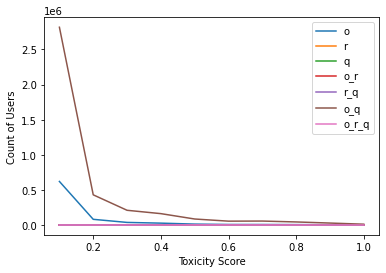

In [ ]:
x = [i/10 for i in range(1, 11)]

for cat in cat_list:
    y = [dict_cat[f"{cat}_{tox}"] for tox in x]
    # print(y)
    plt.plot(x, y, label=cat)

plt.xlabel("Toxicity Score")
plt.ylabel("Count of Users")
# plt.title(f"Month - {len(monthDf['Toxicity'])}")
plt.legend()
plt.show()

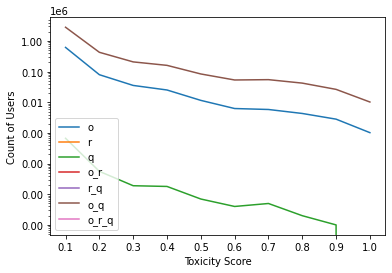

In [ ]:
x = [i/10 for i in range(1, 11)]
for cat in cat_list:
    y = [dict_cat[f"{cat}_{tox}"] for tox in x]
    plt.semilogy(x, y, label=cat)

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
# plt.gca().yaxis.set_major_locator(ticker.MaxNLocator())

plt.xlabel("Toxicity Score")
plt.ylabel("Count of Users")
plt.xticks(x)
# plt.set_ylim(bottom=0)
plt.legend()
plt.show()

In [ ]:
# for i in UserDF.rows():
#   """i[0]- userid
#   i[1]- category"""
#   cat = i[1]
#   cat_user = monthDf.filter(i[0])
#   for j in cat_user.rows():
#     t_score = j["toxicity_score"]
#     string_put = f"{cat}_{t_score}"
#     dict_cat[string_put] += 1

In [ ]:
'''
I have a data frame in python pandas with the following columns.
monthDf = df[['user_id', 'Toxicity','qt_flag', 'rt_flag']]

The user_id contains the id's of all the users
The Toxicity contains float values between 0-1
The qt_flag says whether the tweet is a quoted tweet or not. The values of the column are True and False. 
The rt_flag says whether the tweet is a retweet or not. The values of the column are True and False. 

I am categorizing the tweets in 3 categories. 
1) original
2) retweet
3) quoted tweet

A tweet is original if qt_flag = False and rt_flag = False
A tweet is retweet if qt_flag = False and rt_flag = True
A tweet is quoted tweet if qt_flag = True and rt_flag = False

A user has multiple tweets in my dataset, each user will have done different types of tweets. I want to count how many users have for each month. I am listing the categories below:
1) original tweets - i.e all the tweets done by the user will only be original
2) retweets - i.e all the tweets done by the user will only be quoted.
3) quoted - i.e all the tweets done by the user will only be quoted. 
4) original and retweet - i.e all the tweets done by the user will only be of the type original and retweet
5) original and quoted - i.e all the tweets done by the user will only be of the type original and quoted.
6) quoted and retweet - i.e all the tweets done by the user will only be of the type quoted and retweet
7) original, quoted and retweet - i.e. i.e all the tweets done by the user will only be of the type original and retweet

This is how I want the categorization to be. For example, if 
- user 1 has 10 tweets and out of which, 2 tweets are quoted and 8 tweets are original, then the user would go into the category of 'original and quoted'
- if user 2 has 7 tweets out of which 3 are retweet and 4 are quoted, then the user would go into the category of 'quoted and retweet'
- if user 3 has 20 tweets out of which 10 tweets are original, 5 are retweet and 5 are quoted, then the user would go into the category of 'original, quoted and retweet'
- if user 4 has 15 tweets out of which 10 retweets and 5 quoted tweets, then the user would go into the category of 'quoted and retweet'

how do I categories all the tweets into the 7 different categories?   

After doing the categorization, I want to make a plot, where on 
x axis I want the toxicity (0.1,0.2,0.3 etc)
and on the y axis I want the number of users from each category, so there will be 7 different lines with 7 different colors for each category

I will tell you in detail how the plot should look like, lets say for the 
first category (original tweets), there are 5 unique users who have a toxicity score 0.1, then the (x,y) would be (0.1,5) and there are 10 unique users who have a toxicity score 0.4, then the plot would plot that. 
lets say the seventh category (original, quoted and retweet) has 7 unique users who have a toxicity score 0.3, then the plot would plot that. 

now I want to make such a plot for all the 7 categories of users, where on the y axis it is number of unique users and on the x axis it is the toxicity score
'''

"\nI have a data frame in python pandas with the following columns.\nmonthDf = df[['user_id', 'Toxicity','qt_flag', 'rt_flag']]\n\nThe user_id contains the id's of all the users\nThe Toxicity contains float values between 0-1\nThe qt_flag says whether the tweet is a quoted tweet or not. The values of the column are True and False. \nThe rt_flag says whether the tweet is a retweet or not. The values of the column are True and False. \n\nI am categorizing the tweets in 3 categories. \n1) original\n2) retweet\n3) quoted tweet\n\nA tweet is original if qt_flag = False and rt_flag = False\nA tweet is retweet if qt_flag = False and rt_flag = True\nA tweet is quoted tweet if qt_flag = True and rt_flag = False\n\nA user has multiple tweets in my dataset, each user will have done different types of tweets. I want to count how many users have for each month. I am listing the categories below:\n1) original tweets - i.e all the tweets done by the user will only be original\n2) retweets - i.e all t